In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import pandas as pd
from config import api_key

In [2]:
# Save config information.
# Create a variable to hold the URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Create a variable to hold the value "metric"
units = "metric"

# Build partial query URL
# <"appid="> is the api_key parameter
# <"&q="> is the query parameter
# <"&units="> is the units parameter
query_url = f"{url}appid={api_key}&units={units}&q="

In [3]:
# List of cities
cities = ["Paris", "London", "Oslo", "Beijing"]

# set up lists to hold response info
# Create a variable to hold a []
lat = []

# Create a variable to hold a []
temp = []

# Loop through the list of cities and perform a request for data on each
# <for city in> for loop iterating each value in 'cities'
for city in cities:

    # <requests.get()> sends an HTTP GET request to the URL specified
    # <.json()> used to parse the JSON content from the HTTP response
    ### and store it as a Python data structure
    response = requests.get(query_url + city).json()

    # accesses the "lat" value within the "coord" dictionary, within the response JSON object
    # <.append()> adds the 'response['coord']['lat']' to the 'lat' []
    lat.append(response['coord']['lat'])

    # <.append()> adds the 'response['main']['temp']' to the 'temp' []
    temp.append(response['main']['temp'])

# <(f" ")> for concatenation
print(f"The latitude information received is: {lat}")

# <(f" ")> for concatenation
print(f"The temperature information received is: {temp}")

The latitude information received is: [48.8534, 51.5085, 59.9127, 39.9075]
The temperature information received is: [2.63, 2.23, -6.32, -5.06]


In [4]:
(query_url + city)

'http://api.openweathermap.org/data/2.5/weather?appid=a2e646057e6a616a5ccdf60228e381ff&units=metric&q=Beijing'

In [5]:
response

{'coord': {'lon': 116.3972, 'lat': 39.9075},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': -5.06,
  'feels_like': -5.06,
  'temp_min': -5.06,
  'temp_max': -5.06,
  'pressure': 1029,
  'humidity': 56,
  'sea_level': 1029,
  'grnd_level': 1022},
 'visibility': 10000,
 'wind': {'speed': 0.56, 'deg': 313, 'gust': 0.62},
 'clouds': {'all': 94},
 'dt': 1705507571,
 'sys': {'type': 1,
  'id': 9609,
  'country': 'CN',
  'sunrise': 1705534392,
  'sunset': 1705569324},
 'timezone': 28800,
 'id': 1816670,
 'name': 'Beijing',
 'cod': 200}

In [6]:
# create a DataFrame from cities, lat, and temp
# creating a dictionary named 'weather_dict'
# dictionary has three keys: "city," "lat," and "temp,"
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}
# <pd.DataFrame()> 
# used to create a pandas DataFrame from the 'weather_dict' {}
# Creates variable 'weather_data'
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,lat,temp
0,Paris,48.8534,2.63
1,London,51.5085,2.23
2,Oslo,59.9127,-6.32
3,Beijing,39.9075,-5.06


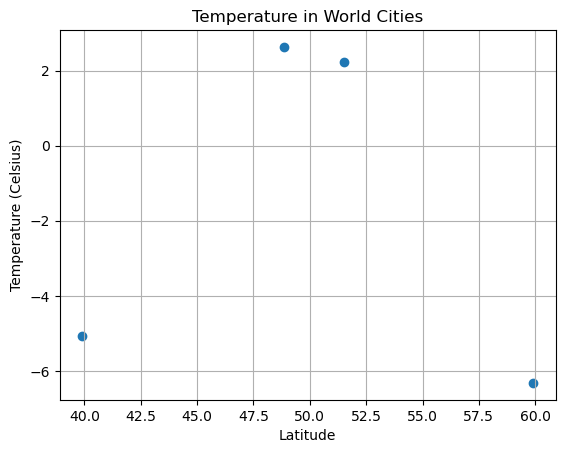

In [7]:
# Build a scatter plot for each data type
# <plt.scatter(x,y,marker=)> is used to create a scatter plot.
# <marker="o"> == circles
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
# <plt.title()> sets the title of your scatter plot
plt.title("Temperature in World Cities")

# <plt.ylabel()> sets the label for the y-axis
plt.ylabel("Temperature (Celsius)")

# <plt.xlabel()> sets the label for the x-axis
plt.xlabel("Latitude")

# <plt.grid()> adds gridlines to the plot
plt.grid(True)

# Save the figure
# <plt.savefig()> used to save the current figure to a file
# specify the file name and format (e.g., PNG, JPEG, PDF) as an argument
plt.savefig("TemperatureInWorldCities.png")

# Show plot
# <plt.show()> used to display the plot that you have configured
plt.show()